#Titanic Data

In [159]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [160]:
titanic_data = pd.read_csv('/content/titanic_data.csv')

In [161]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [102]:
titanic_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [162]:
titanic_data['Survived'] = titanic_data['Survived'].replace([1,0],['Survived','Died'])

##Analysing on the basis of gender

In [163]:
titanic_data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

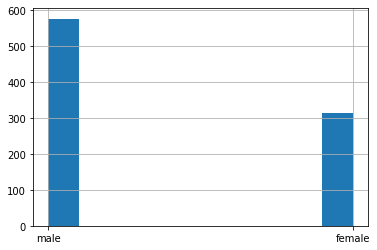

In [164]:
titanic_data['Sex'].hist()

There were more males than females

In [165]:
def group(titanic_data,feature):
  l=[]
  grouped_data = titanic_data.groupby('Survived')
  for i,data in grouped_data:
    print(i)
    print('===========')
    print(data[feature].value_counts())
    l.append(data)
  return l

In [166]:
group_df = group(titanic_data,'Sex')

Died
male      468
female     81
Name: Sex, dtype: int64
Survived
female    233
male      109
Name: Sex, dtype: int64


Text(0.5, 1.0, 'Survived')

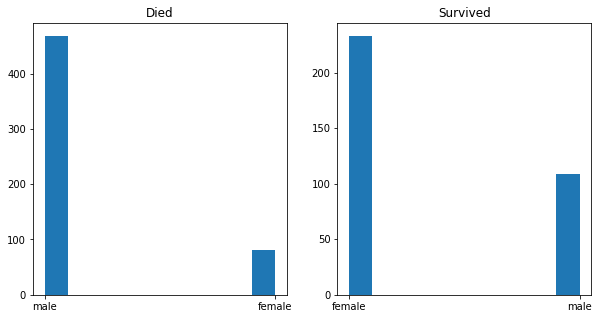

In [167]:
fig,axes = plt.subplots(1,2,figsize=(10,5))
axes[0].hist(group_df[0]['Sex'])
axes[0].set_title('Died')

axes[1].hist(group_df[1]['Sex'])
axes[1].set_title('Survived')


Survival rate for men is around 20% and for female is 75%. So, the gender play a huge role in survival rate.

##Analysing on the basis of age

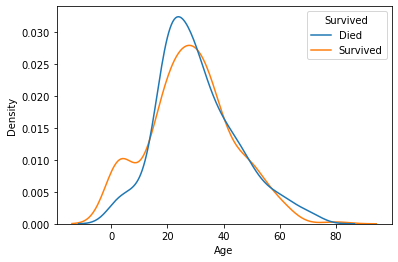

In [168]:
sns.kdeplot(x=titanic_data['Age'], data=titanic_data, hue='Survived', cumulative=False, common_norm=False)

Majority of passengers were aged between 20-40. Also, their survival rate was less compared to children. Also, the number of aged people that survived is less compared to those who died. 

This could mean that more priority was given to save childrens compared to the aged. 


##Analysis based of fare

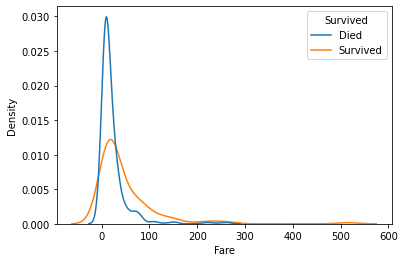

In [169]:
sns.kdeplot(x=titanic_data['Fare'], data=titanic_data, hue='Survived', cumulative=False, common_norm=False)

It is clear that the passengers that paid a higher fare survived compared to the low fare passengers. This could mean that more priority were given to rich passengers. Money mattered!

##Analysis based on passenger class

In [170]:
group_df = group(titanic_data,'Pclass')

Died
3    372
2     97
1     80
Name: Pclass, dtype: int64
Survived
1    136
3    119
2     87
Name: Pclass, dtype: int64


Text(0.5, 1.0, 'Survived')

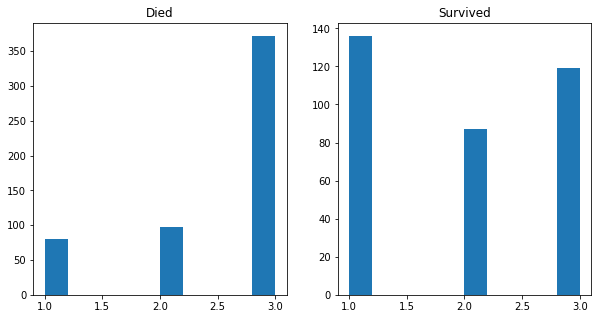

In [171]:
fig,axes = plt.subplots(1,2,figsize=(10,5))
axes[0].hist(group_df[0]['Pclass'])
axes[0].set_title('Died')

axes[1].hist(group_df[1]['Pclass'])
axes[1].set_title('Survived')


Survival rate for Class 1 passengers = 136 / (136+80) = 62%<br>
Survival rate for Class 2 passengers = 87 / (87+97) = 47%<br>
Survival rate for Class 3 passengers = 119 / (119+372) = 23%<br>

It is clear that class 1 passengers were given more priority compared to the others. Again, money and influence paid some role in escaping death.

##Analysis based on embarkment

In [172]:
group_df = group(titanic_data,'Embarked')

Died
S    427
C     75
Q     47
Name: Embarked, dtype: int64
Survived
S    217
C     93
Q     30
Name: Embarked, dtype: int64


In [ ]:
fig,axes = plt.subplots(1,2,figsize=(10,5))
axes[0].hist(group_df[0]['Embarked'])
axes[0].set_title('Died')

axes[1].hist(group_df[1]['Embarked'])
axes[1].set_title('Survived')


In [175]:
group_df[1]['Embarked']

1      C
2      S
3      S
8      S
9      C
      ..
875    C
879    C
880    S
887    S
889    C
Name: Embarked, Length: 342, dtype: object

Survival rate for passengers embarked from Southampton = 217 / (217+427) = 33%<br>
Survival rate for passengers embarked from Cherbourg = 93 / (93+75) = 55%<br>
Survival rate for passengers embarked from Queenstown = 30 / (30+47) = 38%<br>

Passengers who embarked from Cherbourg survived compared to other passengers. This could be because of the space there were allocated inside the ship. That part would have suffered less damage. This should be investigated further.

##Analysis based on Parch and SSib

In [176]:
group_df = group(titanic_data,'Parch')

Died
0    445
1     53
2     40
5      4
4      4
3      2
6      1
Name: Parch, dtype: int64
Survived
0    233
1     65
2     40
3      3
5      1
Name: Parch, dtype: int64


Text(0.5, 1.0, 'Survived')

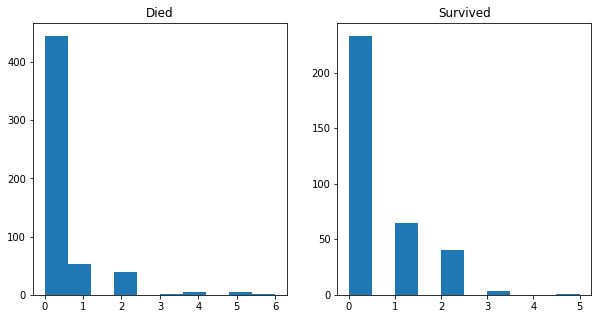

In [177]:
fig,axes = plt.subplots(1,2,figsize=(10,5))
axes[0].hist(group_df[0]['Parch'])
axes[0].set_title('Died')

axes[1].hist(group_df[1]['Parch'])
axes[1].set_title('Survived')


Majority of passengers didn't have parents or children aboard. But survival rate was comparitively high for passengers with parents or children aboard. 

In [136]:
group_df = group(titanic_data,'SibSp')

Died
0    398
1     97
4     15
2     15
3     12
8      7
5      5
Name: SibSp, dtype: int64
Survived
0    210
1    112
2     13
3      4
4      3
Name: SibSp, dtype: int64


Text(0.5, 1.0, 'Survived')

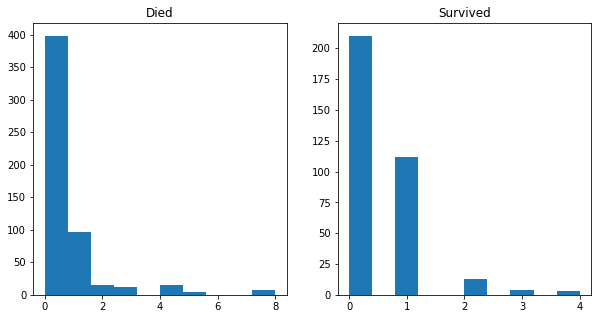

In [178]:
fig,axes = plt.subplots(1,2,figsize=(10,5))
axes[0].hist(group_df[0]['SibSp'])
axes[0].set_title('Died')

axes[1].hist(group_df[1]['SibSp'])
axes[1].set_title('Survived')


Majority of passengers didn't have any siblings or spouse with them and their survival rate was low. We could say that survival rate was less for passengers that travelled alone. 

Passengers that had siblings/spouse aboard, had more survival rate.

##Conclusion
The features such as gender, age, fare plays an important role in deciding the survival rate of passengers. 

Features like 'Pclass' , 'Embarked' , 'Parch' , 'SibSp' also plays some role but needs to be further investigated. 

